In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data


--2023-07-09 14:38:18--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2023-07-09 14:38:18--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd5711524ff5039243285c7ae2a.dl.dropboxusercontent.com/zip_download_get/Bi57qx-3Il8F7JUyWVu5mWEl0QbUH_El47rWCDUL6ubDBsXQIvHjJNJBYFuj3xMWO18VWQ4vC-U3cN1-0LBFJSXdhN2yGwGv1KJy3K7i5YdCrQ# [following]
--2023-07-09 14:38:19--  https://ucd5711524ff5039243285c7ae2a.dl.dropboxusercontent.com/zip_download_get/Bi57qx-3Il8F7JUyWVu5mWEl0QbUH_El47rWCDUL6ubDBsXQIvHjJNJBYFuj3xMWO18VWQ4vC-U3cN1-0LBFJSXdhN2yGwGv1

In [3]:
!unzip data -d "images/"

Archive:  data
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracting: images/Tra

In [4]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [5]:
classes = os.listdir("images/Train")

In [6]:
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [14]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [15]:
for pokemon_type in classes:
  path = "images/Test/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 42
Pikachu - 40
Bulbasaur - 41


In [16]:
from keras_preprocessing import image

In [17]:
train_data = []
train_labels = []

In [18]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder, image_name)

    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
len(train_data)

304

In [20]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [22]:
train_data = train_data.reshape(len(train_data), 30000)

In [23]:
train_data.shape

(304, 30000)

In [26]:
category2label = {"Pikachu": 0, "Charmander": 1, "Bulbasaur": 2}
label2category = {0:"Pikachu", 1:"Charmander", 2:"Bulbasaur"}

In [27]:
train_labels = np.array([category2label[label] for label in train_labels])

In [28]:
from keras.utils import to_categorical

In [29]:
train_labels = to_categorical(train_labels)

In [30]:
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [31]:
from keras.layers import Dense
from keras import Sequential

In [32]:
features = train_data.shape[1]

In [33]:
model = Sequential()

In [36]:
model.add( Dense(units=512, activation='relu', input_shape=(features,)))

In [37]:
model.add( Dense(units=256, activation='relu'))

In [38]:
model.add( Dense(units=128, activation='relu'))

In [39]:
model.add( Dense(units=64, activation='relu'))

In [41]:
model.add( Dense(units=3, activation='softmax'))

In [42]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               15360512  
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
Total params: 15,533,199
Trainable params: 15,533,199
No

In [44]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 5s 320ms/step - loss: 483.8549 - accuracy: 0.3750
Epoch 2/50
10/10 [==============================] - 3s 270ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 3/50
10/10 [==============================] - 3s 267ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 4/50
10/10 [==============================] - 3s 267ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 5/50
10/10 [==============================] - 4s 390ms/step - loss: 1.0987 - accuracy: 0.3322
Epoch 6/50
10/10 [==============================] - 3s 260ms/step - loss: 1.0987 - accuracy: 0.3322
Epoch 7/50
10/10 [==============================] - 3s 264ms/step - loss: 1.0987 - accuracy: 0.3322
Epoch 8/50
10/10 [==============================] - 3s 264ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 9/50
10/10 [==============================] - 3s 312ms/step - loss: 1.0986 - accuracy: 0.3322
Epoch 10/50
10/10 [==============================] - 3s 312ms/step - loss: 1.0986 - accuracy: 0.33

In [51]:
test_image = "/content/testing poki Classification.jpg"

img = image.load_img(test_image, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

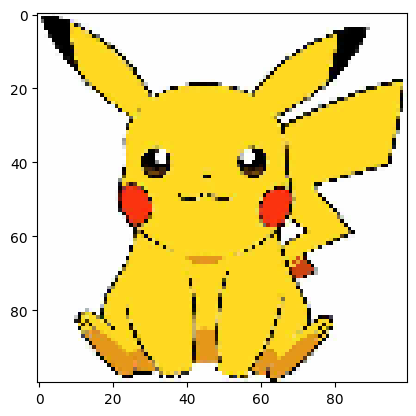

In [52]:
plt.imshow(img.astype('int'));

In [53]:
img = img.reshape(1, 30000)

In [54]:
model.predict(img).argmax()

1/1 [==============================] - 0s 37ms/step


1

In [55]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 43ms/step


'Charmander'